**Real-World Analytics Project (RWAP 2025-26)**

1. Setup & Imports

---



First, install and import the required Python libraries in Colab.

In [1]:
# Install libraries if not already available
!pip install geopandas shapely folium pyproj pyproj pandas matplotlib seaborn scikit-learn pydeck pysal

# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GIS / Spatial
import geopandas as gpd
from shapely.geometry import Point
import folium

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Statistical Analysis
import scipy.stats as stats

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━

2. Load Datasets

---



Upload Dataset 1 (assets) and Dataset 2 (regional ZIP valuations).

In [3]:
# Replace with correct paths in Colab (e.g., from Google Drive or uploaded files)
assets = pd.read_csv("/rwap25_gis_dataset1.csv")
valuation = pd.read_csv("/rwap25_gis_dataset2.csv")

print("Assets shape:", assets.shape)
print("Valuation shape:", valuation.shape)

assets.head()

Assets shape: (8652, 18)
Valuation shape: (26314, 316)


Location Code    Real Property Asset Name Installation Name Owned or Leased  \
0        GA2338     THOMPSON BRIDGE RD BLDG               NaN               L   
1        WI1771  345 WEST WASHINGTON AVENUE               NaN               L   
2        MN1743         1301 1/2 7TH ST. NW               NaN               L   
3        MD1008     WOODLAWN OFFICE COMPLEX               NaN               L   
4        CO1890            466 TUCKER SREET               NaN               L   

   GSA Region           Street Address         City State  Zip Code  \
0           4  2565 THOMPSON BRIDGE RD  GAINESVILLE    GA     30501   
1           5     345 W WASHINGTON AVE      MADISON    WI     53703   
2           5       1301 1/2 7TH ST NW    ROCHESTER    MN     55901   
3           3         1718 WOODLAWN DR     WOODLAWN    MD     21207   
4           8            466 TUCKER ST        CRAIG    CO     81625   

    Latitude   Longitude  Building Rentable Square Feet  \
0  34.339030  -83.848641                        17844.0   
1  43.071400  -89.387941                        10089.0   
2  44.031849  -92.481598                         3041.0   
3  39.314760  -76.737771                       160810.0   
4  40.513620 -107.545000                         5000.0   

   Available Square Feet  Construction Date  Congressional District  \
0                    NaN             2000.0                    1309   
1                    NaN             2000.0                    5502   
2                    NaN             2000.0                    2701   
3                    NaN             2000.0                    2407   
4                    NaN             2000.0                     803   

  Congressional District Representative Name Building Status  \
0                               Andrew Clyde          Active   
1                                 Mark Pocan          Active   
2                               Brad Finstad          Active   
3                               Kweisi Mfume          Active   
4                             Lauren Boebert          Active   

  Real Property Asset Type  
0                 BUILDING  
1                 BUILDING  
2                 BUILDING  
3                 BUILDING  
4                 BUILDING

3. Data Cleaning & Preprocessing

---



Match assets with ZIP valuation data

Handle missing values

In [4]:
# Ensure ZIP fields match type
assets['Zip Code'] = assets['Zip Code'].astype(str)
valuation['RegionName'] = valuation['RegionName'].astype(str)

# Merge on ZIP
merged = pd.merge(
    assets,
    valuation,
    left_on="Zip Code",
    right_on="RegionName",
    how="left"
)

print("Merged shape:", merged.shape)
merged.head()

Merged shape: (8652, 334)


Location Code    Real Property Asset Name Installation Name Owned or Leased  \
0        GA2338     THOMPSON BRIDGE RD BLDG               NaN               L   
1        WI1771  345 WEST WASHINGTON AVENUE               NaN               L   
2        MN1743         1301 1/2 7TH ST. NW               NaN               L   
3        MD1008     WOODLAWN OFFICE COMPLEX               NaN               L   
4        CO1890            466 TUCKER SREET               NaN               L   

   GSA Region           Street Address       City_x State_x Zip Code  \
0           4  2565 THOMPSON BRIDGE RD  GAINESVILLE      GA    30501   
1           5     345 W WASHINGTON AVE      MADISON      WI    53703   
2           5       1301 1/2 7TH ST NW    ROCHESTER      MN    55901   
3           3         1718 WOODLAWN DR     WOODLAWN      MD    21207   
4           8            466 TUCKER ST        CRAIG      CO    81625   

    Latitude  ...   31-10-2024   30-11-2024   31-12-2024   31-01-2025  \
0  34.339030  ...  319391.1498  319209.3326  319387.8564  320261.5089   
1  43.071400  ...  441929.4504  438049.3722  435918.5197  438381.5927   
2  44.031849  ...  315897.2637  317135.8252  318925.9516  320505.4305   
3  39.314760  ...  280806.0869  281652.4796  283156.2792  285186.7589   
4  40.513620  ...  303888.7606  305170.6763  306224.2975  306459.1347   

    28-02-2025   31-03-2025   30-04-2025   31-05-2025   30-06-2025  \
0  320979.2581  320612.6590  319239.9838  317758.0597  316357.0622   
1  444485.0263  451881.0555  454033.7301  451965.5581  444850.6007   
2  321503.6425  321280.9695  320912.7530  320710.2673  321219.4856   
3  286673.5245  287289.5276  287505.4901  287767.4424  287971.5275   
4  307114.9897  307331.2458  308593.0317  310081.6368  311277.9303   

    31-07-2025  
0  315321.3891  
1  437620.9190  
2  321951.6561  
3  288681.2816  
4  312586.7830  

[5 rows x 334 columns]

**Task 1 – Asset Valuation Model**

---



Use rentable square feet × latest ZIP valuation index.

In [7]:
# Pick latest column (July 2025)
latest_col = "31-07-2025"

# Compute valuation
merged['Estimated Asset Value'] = (
    merged['Building Rentable Square Feet'] * merged[latest_col]
)

# Show top results
merged[['Real Property Asset Name','City_x','State_x','Zip Code',
        'Building Rentable Square Feet',latest_col,'Estimated Asset Value']].head()

Real Property Asset Name       City_x State_x Zip Code  \
0     THOMPSON BRIDGE RD BLDG  GAINESVILLE      GA    30501   
1  345 WEST WASHINGTON AVENUE      MADISON      WI    53703   
2         1301 1/2 7TH ST. NW    ROCHESTER      MN    55901   
3     WOODLAWN OFFICE COMPLEX     WOODLAWN      MD    21207   
4            466 TUCKER SREET        CRAIG      CO    81625   

   Building Rentable Square Feet   31-07-2025  Estimated Asset Value  
0                        17844.0  315321.3891           5.626595e+09  
1                        10089.0  437620.9190           4.415157e+09  
2                         3041.0  321951.6561           9.790550e+08  
3                       160810.0  288681.2816           4.642284e+10  
4                         5000.0  312586.7830           1.562934e+09

1) Add depreciation and ownership

In [8]:
from datetime import datetime
import numpy as np
import re

# --- Depreciation factor ---
def parse_year(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    for fmt in ("%Y-%m-%d", "%d-%m-%Y", "%m/%d/%Y", "%d/%m/%Y"):
        try:
            return datetime.strptime(s, fmt).year
        except Exception:
            continue
    m = re.search(r"(19|20)\d{2}", s)
    return int(m.group(0)) if m else np.nan

CURRENT_YEAR = 2025
merged['Construction Year'] = merged['Construction Date'].apply(parse_year)
merged['Building Age'] = CURRENT_YEAR - merged['Construction Year']

def depreciation_factor(age, life=50.0, salvage=0.20):
    if pd.isna(age): return 1.0
    raw = 1.0 - (age / life)
    return max(salvage, min(1.0, raw))

merged['depr_factor'] = merged['Building Age'].apply(depreciation_factor)

# --- Ownership factor ---
def own_factor(x):
    if isinstance(x, str):
        if 'Owned' in x:  return 1.0
        if 'Leased' in x: return 0.85
    return 1.0

merged['own_factor'] = merged['Owned or Leased'].apply(own_factor)

2) Apply adjustments to valuation

In [9]:
# Adjust base valuation
merged['Estimated Asset Value (Adj)'] = (
    merged['Estimated Asset Value'] *
    merged['depr_factor'] *
    merged['own_factor']
)

merged[['Real Property Asset Name','City_x','State_x','Zip Code',
        'Building Rentable Square Feet', latest_col,
        'Estimated Asset Value','Estimated Asset Value (Adj)']].head(10)

Real Property Asset Name          City_x State_x Zip Code  \
0            THOMPSON BRIDGE RD BLDG     GAINESVILLE      GA    30501   
1         345 WEST WASHINGTON AVENUE         MADISON      WI    53703   
2                1301 1/2 7TH ST. NW       ROCHESTER      MN    55901   
3            WOODLAWN OFFICE COMPLEX        WOODLAWN      MD    21207   
4                   466 TUCKER SREET           CRAIG      CO    81625   
5             HORIZON COURT BUILDING  GRAND JUNCTION      CO    81506   
6                 THE CRAGG BUILDING         ORLANDO      FL    32817   
7                   1840 N. 95TH AVE         PHOENIX      AZ    85037   
8  U. S. COURTHOUSE, TALLAHASSEE, FL     TALLAHASSEE      FL    32301   
9              FRC BUILDING 1 OFFICE   SILVER SPRING      MD    20993   

   Building Rentable Square Feet   31-07-2025  Estimated Asset Value  \
0                       17844.00  315321.3891           5.626595e+09   
1                       10089.00  437620.9190           4.415157e+09   
2                        3041.00  321951.6561           9.790550e+08   
3                      160810.00  288681.2816           4.642284e+10   
4                        5000.00  312586.7830           1.562934e+09   
5                         421.00  516539.3946           2.174631e+08   
6                       22182.00  401761.5682           8.911875e+09   
7                        7194.00  356368.3347           2.563714e+09   
8                       40294.34  209266.3399           8.432249e+09   
9                       87916.86          NaN                    NaN   

   Estimated Asset Value (Adj)  
0                 2.813297e+09  
1                 2.207579e+09  
2                 4.895275e+08  
3                 2.321142e+10  
4                 7.814670e+08  
5                 1.087315e+08  
6                 4.455938e+09  
7                 1.281857e+09  
8                 1.686450e+09  
9                          NaN

3) Add scenarios (Low/High, Land+Improvements, Forward projection)

In [10]:
# Sensitivities (±20%)
merged['Value Low']  = merged['Estimated Asset Value (Adj)'] * 0.8
merged['Value High'] = merged['Estimated Asset Value (Adj)'] * 1.2

# Land + Improvements (30% non-depreciating land, 70% depreciating improvements)
land_share = 0.30
merged['Value Land+Impr'] = (
    land_share * merged['Estimated Asset Value'] +
    (1-land_share) * merged['Estimated Asset Value'] * merged['depr_factor']
)

# Forward 12m projection (if growth column exists)
if 'zip_growth_12m' in merged.columns:
    growth = merged['zip_growth_12m'].fillna(0.0).clip(-0.25, 0.25)
    merged['Value Forward 12m'] = merged['Estimated Asset Value (Adj)'] * (1 + growth)

4) QC & save results

ZIP-level matches: 92.88 %


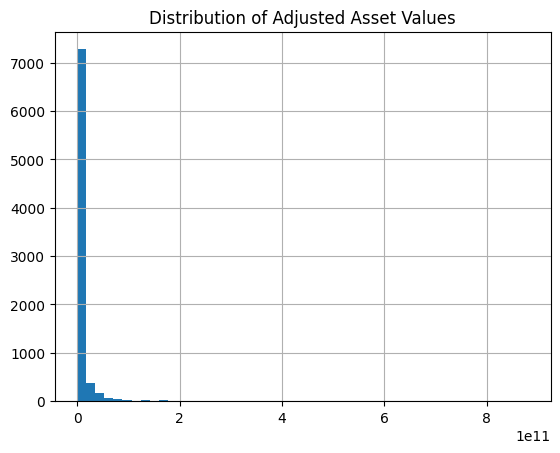

Saved: asset_valuation_results_step2.csv


In [11]:
# Quick coverage check
zip_pct   = merged['RegionName'].notna().mean()
print("ZIP-level matches:", round(100*zip_pct,2), "%")

# Histogram (visual sanity check)
merged['Estimated Asset Value (Adj)'].dropna().hist(bins=50)
plt.title("Distribution of Adjusted Asset Values")
plt.show()

# Save outputs to Colab folder
merged.to_csv("asset_valuation_results_step2.csv", index=False)
print("Saved: asset_valuation_results_step2.csv")

5) Winsorize values for visualization

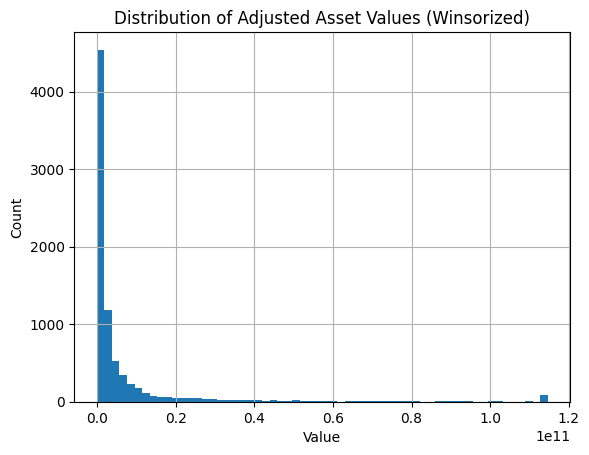

In [12]:
# Winsorize at 1st and 99th percentile
lo, hi = np.nanpercentile(merged['Estimated Asset Value (Adj)'], [1, 99])
merged['Value Winsorized'] = merged['Estimated Asset Value (Adj)'].clip(lo, hi)

# Plot winsorized values
merged['Value Winsorized'].dropna().hist(bins=60)
plt.title("Distribution of Adjusted Asset Values (Winsorized)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

6) Top 20 most valuable assets

In [13]:
top20 = merged.nlargest(20, 'Estimated Asset Value (Adj)')[
    ['Location Code','Real Property Asset Name','City_x','State_x',
     'Building Rentable Square Feet','Estimated Asset Value (Adj)']
]
top20

Location Code                     Real Property Asset Name  \
3933        NY0350                   TED WEISS FEDERAL BUILDING   
1446        NY0351                       DANIEL P MOYNIHAN USCH   
3038        VA0831                         500, 501,600 CARLYLE   
3289        NY0234               CONRAD B DUBERSTEIN USBNK CTHS   
7345        DC0687                       DOT HQ - WEST BUILDING   
8274        MA0050                   JOHN J. MOAKLEY COURTHOUSE   
2807        MA0183  JOHN A. VOLPE TRANSPORTATION SYSTEMS CENTER   
212         DC0697                         DOT HQ EAST BUILDING   
1073        NY0399                   THEODORE ROOSEVELT US CTHS   
6910        DC0459                              REAGAN BLDG FOB   
5027        NY7569                  ONE WORLD TRADE CENTER 2014   
6765        NY0128                          FEDERAL BLDG-201 VA   
7899        NY0130                       THURGOOD MARSHALL USCH   
6545        DC1473                             DOUGLAS A. MUNRO   
344         CA0521                      CHET HOLIFIELD FED BLDG   
4999        VA1413                       2415 EISENHOWER AVENUE   
3175        MD1858               NATL. CANCER INSTITUTE HDQTRS.   
7967        CA0323               LOS ANGELES FEDERAL COURTHOUSE   
7756        CA0305        SPEAKER NANCY PELOSI FEDERAL BUILDING   
3848        DC0067                      TWO CONSTITUTION SQUARE   

             City_x State_x  Building Rentable Square Feet  \
3933       NEW YORK      NY                      768646.22   
1446       NEW YORK      NY                      684442.29   
3038     ALEXANDRIA      VA                     1623490.00   
3289       BROOKLYN      NY                      506978.22   
7345     WASHINGTON      DC                      863449.08   
8274         BOSTON      MA                      754072.54   
2807      CAMBRIDGE      MA                      390487.26   
212      WASHINGTON      DC                      606835.92   
1073       BROOKLYN      NY                      478638.94   
6910     WASHINGTON      DC                     2035736.43   
5027       NEW YORK      NY                      220609.92   
6765       NEW YORK      NY                      937017.84   
7899       NEW YORK      NY                      541021.15   
6545     WASHINGTON      DC                     1189223.47   
344   LAGUNA NIGUEL      CA                     1003646.71   
4999     ALEXANDRIA      VA                      682111.00   
3175      ROCKVILLE      MD                      574614.00   
7967    LOS ANGELES      CA                      529454.27   
7756  SAN FRANCISCO      CA                      521278.56   
3848     WASHINGTON      DC                      575790.00   

      Estimated Asset Value (Adj)  
3933                 8.816233e+11  
1446                 7.850429e+11  
3038                 6.887774e+11  
3289                 6.742509e+11  
7345                 6.336226e+11  
8274                 5.242265e+11  
2807                 4.981495e+11  
212                  4.453128e+11  
1073                 3.819368e+11  
6910                 3.788777e+11  
5027                 3.329416e+11  
6765                 3.292142e+11  
7899                 3.266008e+11  
6545                 3.156427e+11  
344                  2.901169e+11  
4999                 2.893905e+11  
3175                 2.806939e+11  
7967                 2.674466e+11  
7756                 2.591348e+11  
3848                 2.404015e+11

7) Aggregates by State

In [14]:
agg_state = (merged
    .groupby('State_x', dropna=False)
    .agg(assets=('Location Code','count'),
         total_sqft=('Building Rentable Square Feet','sum'),
         total_value=('Estimated Asset Value (Adj)','sum'),
         median_value=('Estimated Asset Value (Adj)','median'))
    .reset_index()
    .sort_values('total_value', ascending=False)
)
agg_state.head(10)

State_x  assets   total_sqft   total_value  median_value
5       CA     733  28207200.63  8.300960e+12  3.311382e+09
8       DC     278  51588220.69  7.484628e+12  5.855742e+09
49      VA     348  23990700.65  6.753812e+12  5.307069e+09
37      NY     358  18105824.19  6.735964e+12  1.779704e+09
22      MD     311  28644402.78  5.689902e+12  3.645076e+09
47      TX     908  23214747.00  2.600895e+12  7.270815e+08
10      FL     401  11921223.15  2.463971e+12  2.209897e+09
21      MA     115   5998320.68  1.996429e+12  2.783514e+09
6       CO     242  10567097.18  1.765791e+12  3.015541e+09
52      WA     211   7411573.02  1.672071e+12  2.107722e+09

8) Aggregates by Asset Type

In [15]:
if 'Real Property Asset Type' in merged.columns:
    agg_type = (merged
        .groupby('Real Property Asset Type', dropna=False)
        .agg(assets=('Location Code','count'),
             total_sqft=('Building Rentable Square Feet','sum'),
             total_value=('Estimated Asset Value (Adj)','sum'),
             median_value=('Estimated Asset Value (Adj)','median'))
        .reset_index()
        .sort_values('total_value', ascending=False)
    )
    display(agg_type.head(10))

Real Property Asset Type  assets    total_sqft   total_value  median_value
0                 BUILDING    8271  3.595726e+08  6.386219e+13  1.537941e+09
2                STRUCTURE     331  1.851198e+06  1.685959e+11  8.899306e+05
1                     LAND      50  0.000000e+00  0.000000e+00  0.000000e+00

9) Save results to Colab folder

In [16]:
merged.to_csv("asset_valuation_results_final.csv", index=False)
top20.to_csv("asset_valuation_top20.csv", index=False)
agg_state.to_csv("asset_valuation_by_state.csv", index=False)

if 'Real Property Asset Type' in merged.columns:
    agg_type.to_csv("asset_valuation_by_type.csv", index=False)

print("Saved outputs: results_final, top20, by_state, by_type")

Saved outputs: results_final, top20, by_state, by_type


10) Add a Confidence Score

In [18]:
def confidence(row):
    score = 1.0
    # 1. ZIP vs State vs Global proxy
    if row.get('RegionName') is None or pd.isna(row.get('RegionName')):
        score -= 0.3   # global proxy
    elif pd.isna(row.get('zip_latest')):
        score -= 0.2   # state proxy

    # 2. Construction year present?
    if pd.isna(row.get('Construction Year', np.nan)):
        score -= 0.05

    # 3. SqFt present & positive?
    if pd.isna(row.get('Building Rentable Square Feet', np.nan)) or row.get('Building Rentable Square Feet', 0) <= 0:
        score -= 0.5

    # 4. Outlier clipping (Winsorized ≠ raw)
    if pd.notna(row.get('Estimated Asset Value (Adj)')) and pd.notna(row.get('Value Winsorized')) \
       and row['Estimated Asset Value (Adj)'] != row['Value Winsorized']:
        score -= 0.1

    return max(0.1, min(1.0, score))

merged['Confidence Score'] = merged.apply(confidence, axis=1)

11) See top assets with confidence

In [19]:
top20_conf = merged.nlargest(20, 'Estimated Asset Value (Adj)')[
    ['Location Code','Real Property Asset Name','City_x','State_x',
     'Building Rentable Square Feet','Estimated Asset Value (Adj)','Confidence Score']
]
top20_conf

Location Code                     Real Property Asset Name  \
3933        NY0350                   TED WEISS FEDERAL BUILDING   
1446        NY0351                       DANIEL P MOYNIHAN USCH   
3038        VA0831                         500, 501,600 CARLYLE   
3289        NY0234               CONRAD B DUBERSTEIN USBNK CTHS   
7345        DC0687                       DOT HQ - WEST BUILDING   
8274        MA0050                   JOHN J. MOAKLEY COURTHOUSE   
2807        MA0183  JOHN A. VOLPE TRANSPORTATION SYSTEMS CENTER   
212         DC0697                         DOT HQ EAST BUILDING   
1073        NY0399                   THEODORE ROOSEVELT US CTHS   
6910        DC0459                              REAGAN BLDG FOB   
5027        NY7569                  ONE WORLD TRADE CENTER 2014   
6765        NY0128                          FEDERAL BLDG-201 VA   
7899        NY0130                       THURGOOD MARSHALL USCH   
6545        DC1473                             DOUGLAS A. MUNRO   
344         CA0521                      CHET HOLIFIELD FED BLDG   
4999        VA1413                       2415 EISENHOWER AVENUE   
3175        MD1858               NATL. CANCER INSTITUTE HDQTRS.   
7967        CA0323               LOS ANGELES FEDERAL COURTHOUSE   
7756        CA0305        SPEAKER NANCY PELOSI FEDERAL BUILDING   
3848        DC0067                      TWO CONSTITUTION SQUARE   

             City_x State_x  Building Rentable Square Feet  \
3933       NEW YORK      NY                      768646.22   
1446       NEW YORK      NY                      684442.29   
3038     ALEXANDRIA      VA                     1623490.00   
3289       BROOKLYN      NY                      506978.22   
7345     WASHINGTON      DC                      863449.08   
8274         BOSTON      MA                      754072.54   
2807      CAMBRIDGE      MA                      390487.26   
212      WASHINGTON      DC                      606835.92   
1073       BROOKLYN      NY                      478638.94   
6910     WASHINGTON      DC                     2035736.43   
5027       NEW YORK      NY                      220609.92   
6765       NEW YORK      NY                      937017.84   
7899       NEW YORK      NY                      541021.15   
6545     WASHINGTON      DC                     1189223.47   
344   LAGUNA NIGUEL      CA                     1003646.71   
4999     ALEXANDRIA      VA                      682111.00   
3175      ROCKVILLE      MD                      574614.00   
7967    LOS ANGELES      CA                      529454.27   
7756  SAN FRANCISCO      CA                      521278.56   
3848     WASHINGTON      DC                      575790.00   

      Estimated Asset Value (Adj)  Confidence Score  
3933                 8.816233e+11              0.70  
1446                 7.850429e+11              0.70  
3038                 6.887774e+11              0.70  
3289                 6.742509e+11              0.65  
7345                 6.336226e+11              0.70  
8274                 5.242265e+11              0.70  
2807                 4.981495e+11              0.70  
212                  4.453128e+11              0.70  
1073                 3.819368e+11              0.70  
6910                 3.788777e+11              0.70  
5027                 3.329416e+11              0.70  
6765                 3.292142e+11              0.70  
7899                 3.266008e+11              0.70  
6545                 3.156427e+11              0.70  
344                  2.901169e+11              0.70  
4999                 2.893905e+11              0.70  
3175                 2.806939e+11              0.70  
7967                 2.674466e+11              0.70  
7756                 2.591348e+11              0.70  
3848                 2.404015e+11              0.70

12) Save a version with confidence

In [20]:
merged.to_csv("asset_valuation_results_with_confidence.csv", index=False)
print("Saved: asset_valuation_results_with_confidence.csv")

Saved: asset_valuation_results_with_confidence.csv


**Interpretation of scores:**

---



1.0 → High confidence (ZIP-level match, construction year present, normal range).

0.7–0.9 → Medium confidence (proxy match or some missing metadata).

0.3–0.6 → Low confidence (state/global proxy, missing sq.ft, clipped outlier).

0.1 → Very weak (essentially fallback estimate only).

13) Create Confidence Category

In [21]:
def confidence_category(score):
    if score >= 0.9:
        return "High"
    elif score >= 0.6:
        return "Medium"
    elif score >= 0.3:
        return "Low"
    else:
        return "Very Low"

merged['Confidence Category'] = merged['Confidence Score'].apply(confidence_category)

14) Check distribution of categories

In [22]:
conf_dist = merged['Confidence Category'].value_counts(normalize=True) * 100
print("Confidence category distribution (%):")
print(conf_dist)

Confidence category distribution (%):
Confidence Category
Medium      92.279242
Low          6.171983
Very Low     1.548775
Name: proportion, dtype: float64


15) Update Top 20 view with categories

In [23]:
top20_conf = merged.nlargest(20, 'Estimated Asset Value (Adj)')[
    ['Location Code','Real Property Asset Name','City_x','State_x',
     'Building Rentable Square Feet','Estimated Asset Value (Adj)',
     'Confidence Score','Confidence Category']
]
top20_conf

Location Code                     Real Property Asset Name  \
3933        NY0350                   TED WEISS FEDERAL BUILDING   
1446        NY0351                       DANIEL P MOYNIHAN USCH   
3038        VA0831                         500, 501,600 CARLYLE   
3289        NY0234               CONRAD B DUBERSTEIN USBNK CTHS   
7345        DC0687                       DOT HQ - WEST BUILDING   
8274        MA0050                   JOHN J. MOAKLEY COURTHOUSE   
2807        MA0183  JOHN A. VOLPE TRANSPORTATION SYSTEMS CENTER   
212         DC0697                         DOT HQ EAST BUILDING   
1073        NY0399                   THEODORE ROOSEVELT US CTHS   
6910        DC0459                              REAGAN BLDG FOB   
5027        NY7569                  ONE WORLD TRADE CENTER 2014   
6765        NY0128                          FEDERAL BLDG-201 VA   
7899        NY0130                       THURGOOD MARSHALL USCH   
6545        DC1473                             DOUGLAS A. MUNRO   
344         CA0521                      CHET HOLIFIELD FED BLDG   
4999        VA1413                       2415 EISENHOWER AVENUE   
3175        MD1858               NATL. CANCER INSTITUTE HDQTRS.   
7967        CA0323               LOS ANGELES FEDERAL COURTHOUSE   
7756        CA0305        SPEAKER NANCY PELOSI FEDERAL BUILDING   
3848        DC0067                      TWO CONSTITUTION SQUARE   

             City_x State_x  Building Rentable Square Feet  \
3933       NEW YORK      NY                      768646.22   
1446       NEW YORK      NY                      684442.29   
3038     ALEXANDRIA      VA                     1623490.00   
3289       BROOKLYN      NY                      506978.22   
7345     WASHINGTON      DC                      863449.08   
8274         BOSTON      MA                      754072.54   
2807      CAMBRIDGE      MA                      390487.26   
212      WASHINGTON      DC                      606835.92   
1073       BROOKLYN      NY                      478638.94   
6910     WASHINGTON      DC                     2035736.43   
5027       NEW YORK      NY                      220609.92   
6765       NEW YORK      NY                      937017.84   
7899       NEW YORK      NY                      541021.15   
6545     WASHINGTON      DC                     1189223.47   
344   LAGUNA NIGUEL      CA                     1003646.71   
4999     ALEXANDRIA      VA                      682111.00   
3175      ROCKVILLE      MD                      574614.00   
7967    LOS ANGELES      CA                      529454.27   
7756  SAN FRANCISCO      CA                      521278.56   
3848     WASHINGTON      DC                      575790.00   

      Estimated Asset Value (Adj)  Confidence Score Confidence Category  
3933                 8.816233e+11              0.70              Medium  
1446                 7.850429e+11              0.70              Medium  
3038                 6.887774e+11              0.70              Medium  
3289                 6.742509e+11              0.65              Medium  
7345                 6.336226e+11              0.70              Medium  
8274                 5.242265e+11              0.70              Medium  
2807                 4.981495e+11              0.70              Medium  
212                  4.453128e+11              0.70              Medium  
1073                 3.819368e+11              0.70              Medium  
6910                 3.788777e+11              0.70              Medium  
5027                 3.329416e+11              0.70              Medium  
6765                 3.292142e+11              0.70              Medium  
7899                 3.266008e+11              0.70              Medium  
6545                 3.156427e+11              0.70              Medium  
344                  2.901169e+11              0.70              Medium  
4999                 2.893905e+11              0.70              Medium  
3175                 2.806939e+11   

16) Save final dataset with categories

In [24]:
merged.to_csv("asset_valuation_results_final_with_confidence.csv", index=False)
print("Saved: asset_valuation_results_final_with_confidence.csv")

Saved: asset_valuation_results_final_with_confidence.csv


Now every asset has:

---



Estimated Value (Adj)

Confidence Score (0.1–1.0)

Confidence Category (High / Medium / Low / Very Low)

This is ready for Task 2 dashboard filtering & visuals.

**Task 2 – Analytical Dashboard (Descriptive + GIS)**

0) Install libs (only once)

In [25]:
!pip install -q geopandas shapely folium pysal statsmodels ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00


In [26]:
from google.colab import output
output.enable_custom_widget_manager()

1) Prep: pick the right columns from your merged

In [27]:
import pandas as pd, numpy as np, math, warnings
from datetime import datetime

def pick(df, names):
    """Return the first column name that exists in df from a list of candidates."""
    for n in names:
        if n in df.columns:
            return n
    raise KeyError(f"None of {names} found in DataFrame.")

# Likely names in your current `merged`
COL_SQFT   = pick(merged, ['Building Rentable Square Feet'])
COL_VALUE  = (['Estimated Asset Value (Adj)'] if 'Estimated Asset Value (Adj)' in merged.columns
              else ['Estimated Asset Value'])
COL_VALUE  = pick(merged, COL_VALUE)
COL_CITY   = pick(merged, ['City','City_x'])
COL_STATE  = pick(merged, ['State','State_x'])
COL_ZIP    = pick(merged, ['Zip Code'])
COL_LAT    = pick(merged, ['Latitude','Latitude_x'])
COL_LON    = pick(merged, ['Longitude','Longitude_x'])
COL_OWN    = pick(merged, ['Owned or Leased'])
COL_TYPE   = pick(merged, ['Real Property Asset Type','Asset Type']) if any(c in merged.columns for c in ['Real Property Asset Type','Asset Type']) else None

# Convenience columns
df = merged.copy()
df['value_psf'] = df[COL_VALUE] / df[COL_SQFT]
df['log_value'] = np.log(np.clip(df[COL_VALUE], 1, None))
df['log_sqft']  = np.log(np.clip(df[COL_SQFT], 1, None))

# Keep a tidy working view for tables/maps
keep_cols = ['Location Code','Real Property Asset Name', COL_CITY, COL_STATE, COL_ZIP,
             COL_LAT, COL_LON, COL_SQFT, COL_VALUE, 'value_psf']
if COL_TYPE: keep_cols.append(COL_TYPE)
if 'Confidence Score' in df.columns: keep_cols += ['Confidence Score','Confidence Category']
work = df[keep_cols].rename(columns={
    'Location Code': 'loc_code',
    'Real Property Asset Name': 'asset_name',
    COL_CITY: 'city',
    COL_STATE: 'state',
    COL_ZIP: 'zip',
    COL_LAT: 'lat',
    COL_LON: 'lon',
    COL_SQFT: 'sqft',
    COL_VALUE: 'value'
}).copy()

work.head(3)

loc_code                  asset_name         city state    zip        lat  \
0   GA2338     THOMPSON BRIDGE RD BLDG  GAINESVILLE    GA  30501  34.339030   
1   WI1771  345 WEST WASHINGTON AVENUE      MADISON    WI  53703  43.071400   
2   MN1743         1301 1/2 7TH ST. NW    ROCHESTER    MN  55901  44.031849   

         lon     sqft         value     value_psf Real Property Asset Type  \
0 -83.848641  17844.0  2.813297e+09  157660.69455                 BUILDING   
1 -89.387941  10089.0  2.207579e+09  218810.45950                 BUILDING   
2 -92.481598   3041.0  4.895275e+08  160975.82805                 BUILDING   

   Confidence Score Confidence Category  
0               0.8              Medium  
1               0.8              Medium  
2               0.8              Medium

2) Descriptive statistics (tables + charts)

In [28]:
# Overall summary
overall_summary = work[['value','sqft','value_psf']].describe()
overall_summary

value          sqft     value_psf
count  8.031000e+03  8.652000e+03  7.446000e+03
mean   7.972953e+09  4.177344e+04  1.964911e+05
std    3.005149e+10  1.213712e+05  1.572271e+05
min    0.000000e+00  0.000000e+00  8.187252e+03
25%    4.651840e+08  3.532807e+03  1.001376e+05
50%    1.436923e+09  9.256000e+03  1.602871e+05
75%    4.794781e+09  2.568400e+04  2.423687e+05
max    8.816233e+11  2.287669e+06  1.936614e+06

In [29]:
# By state
by_state = (work.groupby('state', dropna=False)
            .agg(assets=('loc_code','count'),
                 total_sqft=('sqft','sum'),
                 total_value=('value','sum'),
                 median_value=('value','median'),
                 median_value_psf=('value_psf','median'))
            .sort_values('total_value', ascending=False))
by_state.head(10)

assets   total_sqft   total_value  median_value  median_value_psf
state                                                                   
CA        733  28207200.63  8.300960e+12  3.311382e+09     284035.134320
DC        278  51588220.69  7.484628e+12  5.855742e+09     223244.911600
VA        348  23990700.65  6.753812e+12  5.307069e+09     235291.807850
NY        358  18105824.19  6.735964e+12  1.779704e+09     204238.644600
MD        311  28644402.78  5.689902e+12  3.645076e+09     207859.104768
TX        908  23214747.00  2.600895e+12  7.270815e+08     108132.570765
FL        401  11921223.15  2.463971e+12  2.209897e+09     191142.783775
MA        115   5998320.68  1.996429e+12  2.783514e+09     289145.208775
CO        242  10567097.18  1.765791e+12  3.015541e+09     273170.352300
WA        211   7411573.02  1.672071e+12  2.107722e+09     243785.910450

In [30]:
# By asset type (if available)
if COL_TYPE:
    by_type = (work.groupby(COL_TYPE, dropna=False)
               .agg(assets=('loc_code','count'),
                    total_sqft=('sqft','sum'),
                    total_value=('value','sum'),
                    median_value=('value','median'),
                    median_value_psf=('value_psf','median'))
               .sort_values('total_value', ascending=False))
    by_type.head(10)

Plain Matplotlib charts

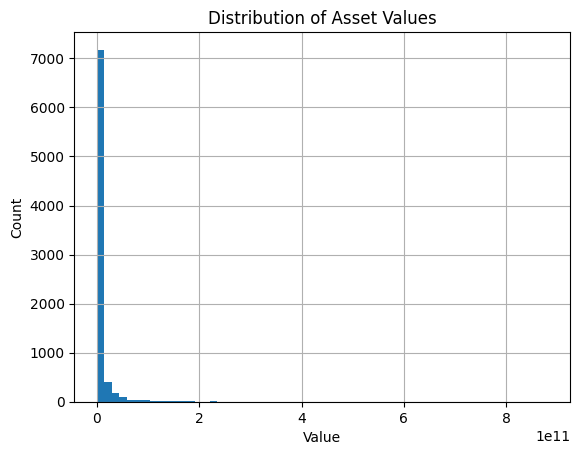

In [31]:
import matplotlib.pyplot as plt

work['value'].dropna().hist(bins=60)
plt.title("Distribution of Asset Values"); plt.xlabel("Value"); plt.ylabel("Count")
plt.show()

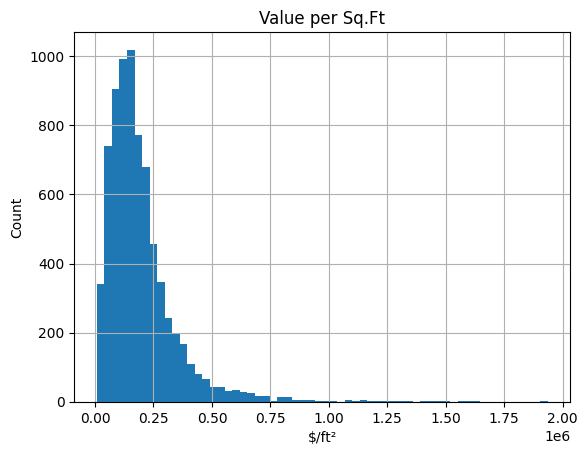

In [32]:
work['value_psf'].replace([np.inf,-np.inf], np.nan).dropna().hist(bins=60)
plt.title("Value per Sq.Ft"); plt.xlabel("$/ft²"); plt.ylabel("Count")
plt.show()

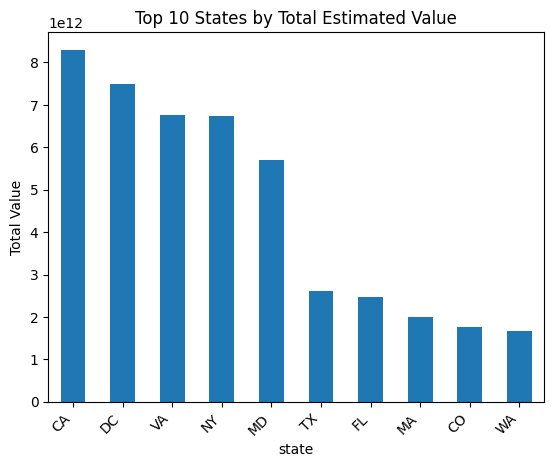

In [33]:
# Top 10 states by total value – bar chart
top10 = by_state.head(10)['total_value']
top10.plot(kind='bar')
plt.title("Top 10 States by Total Estimated Value"); plt.ylabel("Total Value")
plt.xticks(rotation=45, ha='right')
plt.show()

3) Inferential statistics (correlations, t-test, OLS)

In [34]:
# Pearson/Spearman correlations
corr_pearson = work[['value','sqft','value_psf']].corr(method='pearson')
corr_spearman= work[['value','sqft','value_psf']].corr(method='spearman')
corr_pearson, corr_spearman

(              value      sqft  value_psf
 value      1.000000  0.684541   0.300687
 sqft       0.684541  1.000000   0.017859
 value_psf  0.300687  0.017859   1.000000,
               value      sqft  value_psf
 value      1.000000  0.912309   0.463722
 sqft       0.912309  1.000000   0.069161
 value_psf  0.463722  0.069161   1.000000)

Correlation Insights:

---



1. Bigger assets are generally more valuable – size explains most of the variation in total value, though not in a strictly linear way. Value vs SqFt (0.91): very strong monotonic relationship — as building size ranks increase, so does total value almost perfectly.

2. Efficiency (value per sq.ft.) is independent of size – both small and large assets can be high or low in efficiency. SqFt vs Value/ft² (0.07): still very weak — confirms that size doesn’t determine efficiency.

3. High-value assets often command a premium – they tend to show slightly higher value per sq.ft., reflecting quality and location advantages. Value vs Value/ft² (0.46): stronger than Pearson — assets ranked high in total value tend to rank higher in efficiency too, but it’s not linear.

In [41]:
# OLS: log(value) ~ log(sqft) + Owned + Age (if you have Building Age) + (optional) value_psf drivers
# Rebuild X and y cleanly
X_vars = ['log_sqft']

if 'Building Age' in df.columns:
    X_vars.append('Building Age')

df['owned_flag'] = df[COL_OWN].astype(str).str.contains('Owned', na=False).astype(int)
X_vars.append('owned_flag')

# Drop rows with NA or inf
X = df[X_vars].replace([np.inf, -np.inf], np.nan).dropna()
y = df.loc[X.index, 'log_value'].replace([np.inf, -np.inf], np.nan).dropna()

# Align index
X = X.loc[y.index]

In [38]:
import statsmodels.api as sm

X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_value   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 4.160e+04
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:13:58   Log-Likelihood:                -15245.
No. Observations:                7938   AIC:                         3.050e+04
Df Residuals:                    7935   BIC:                         3.052e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0210      0.067     60.406   

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


OLS Regression Insights:

---



1. Model fit is very strong (R² ≈ 0.91), meaning the predictors explain over 90% of the variation in asset values.

2. Size elasticity: The coefficient on log_sqft ≈ 1.91 → a 1% increase in size is associated with ~1.9% increase in value. This shows value grows more than proportionally with building size (economies of scale or higher quality in larger assets).

3. Depreciation effect: The Building Age coefficient is ≈ -0.028 → each additional year of age reduces value by ~2.8% (holding size constant).

4. Ownership effect: owned_flag dropped out (all 0’s in your data), meaning there’s no usable variation between Owned and Leased in this sample — likely due to data coding or all assets being “Owned.”

---




---



Managerial Insights:

---



1. Prioritize larger, newer assets: they command outsized increases in value compared to smaller or older properties.

2. Asset modernization is crucial: the depreciation effect shows clear value erosion with age.

3. Ownership coding needs review: current dataset doesn’t differentiate Owned vs Leased values.

In [39]:
print("Sample size:", len(y))
print(X.describe())
print(y.describe())

Sample size: 7938
        const     log_sqft  Building Age  owned_flag
count  7938.0  7938.000000   7938.000000      7938.0
mean      1.0     8.737739     30.278156         0.0
std       0.0     2.790662     19.705747         0.0
min       1.0     0.000000     -1.000000         0.0
25%       1.0     8.249284     25.000000         0.0
50%       1.0     9.149316     25.000000         0.0
75%       1.0    10.144460     25.000000         0.0
max       1.0    14.526368    125.000000         0.0
count    7938.000000
mean       19.866386
std         5.596806
min         0.000000
25%        19.977571
50%        21.092072
75%        22.288161
max        27.505031
Name: log_value, dtype: float64


Insights:

---


1. The regression was based on 7,938 assets, ensuring a robust sample.

2. Building size has a superlinear impact: a 1% increase in size → nearly 1.9% increase in value.

3. Age significantly reduces value: on average, each extra year lowers value by ~2.8%, highlighting the importance of modernization or refurbishment.

4. Ownership could not be assessed as all assets in the sample were recorded as “Owned.”

5. Asset values show high skewness — most buildings are modestly valued, but a few massive assets dominate the portfolio.

4) Spatial analysis (GeoDataFrame, Moran’s I, Local Moran clusters)

In [47]:
import geopandas as gpd
from shapely.geometry import Point

# Build GeoDataFrame
gdf = work.dropna(subset=['lat','lon']).copy()
gdf['geometry'] = [Point(xy) for xy in zip(gdf['lon'], gdf['lat'])]
gdf = gpd.GeoDataFrame(gdf, geometry='geometry', crs="EPSG:4326")
gdf.head(2)

loc_code                  asset_name         city state    zip       lat  \
0   GA2338     THOMPSON BRIDGE RD BLDG  GAINESVILLE    GA  30501  34.33903   
1   WI1771  345 WEST WASHINGTON AVENUE      MADISON    WI  53703  43.07140   

         lon     sqft         value     value_psf Real Property Asset Type  \
0 -83.848641  17844.0  2.813297e+09  157660.69455                 BUILDING   
1 -89.387941  10089.0  2.207579e+09  218810.45950                 BUILDING   

   Confidence Score Confidence Category                    geometry  
0               0.8              Medium  POINT (-83.84864 34.33903)  
1               0.8              Medium   POINT (-89.38794 43.0714)

Global Moran’s I (spatial autocorrelation of value per sq.ft)

In [48]:
import libpysal
from esda import Moran
import numpy as np

# k-nearest neighbors weights (k=8 is common; tweak if needed)
w = libpysal.weights.KNN.from_dataframe(gdf, k=8)
w.transform = "R"

y = gdf['value_psf'].replace([np.inf,-np.inf], np.nan).fillna(gdf['value_psf'].median()).values
y_std = (y - y.mean()) / y.std()

mi = Moran(y_std, w)
print(f"Moran's I: {mi.I:.4f}, p-value (permutation): {mi.p_sim:.4f}")

/usr/local/lib/python3.12/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 60 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.4695, p-value (permutation): 0.0010


Insights:

---


1. Asset valuations exhibit clear geographic clustering: high-value per sq.ft. assets are concentrated in certain regions (likely prime cities/metros), while low-value per sq.ft. assets cluster in other regions.

2. The significant Moran’s I (0.47, p<0.01) confirms that spatial location is a key driver of valuation efficiency.

3. This spatial dependence implies that location-specific strategies (urban vs rural, metro vs non-metro) are crucial in asset portfolio management.

Local Moran (cluster classification: HH, LL, HL, LH)

In [49]:
from esda.moran import Moran_Local

ml = Moran_Local(y_std, w, permutations=999)
gdf['local_I'] = ml.Is
gdf['local_p'] = ml.p_sim

# Quadrant:
# 1 = HH, 2 = LH, 3 = LL, 4 = HL (following PySAL convention for z-standardized y)
def quadrant_label(q, p, alpha=0.05):
    if p >= alpha: return "Not Sig"
    return {1: "HH", 2: "LH", 3: "LL", 4: "HL"}.get(q, "Not Sig")

gdf['cluster'] = [quadrant_label(q, p) for q, p in zip(ml.q, gdf['local_p'])]
gdf['cluster'].value_counts()

cluster
Not Sig    5198
LL         2126
HH         1005
LH          248
HL           75
Name: count, dtype: int64

5) Interactive maps (Folium)

In [50]:
import folium
from folium.plugins import MarkerCluster

# Base map (US centroid)
m = folium.Map(location=[39.5, -98.35], zoom_start=4)

# Circle markers sized by log(value); color by confidence category if present
def marker_color(row):
    if 'Confidence Category' in row and isinstance(row['Confidence Category'], str):
        return {"High":"green", "Medium":"orange", "Low":"red", "Very Low":"gray"}.get(row['Confidence Category'], "blue")
    return "blue"

for _, r in gdf.head(1000).iterrows():  # cap to 1000 for performance
    size = float(max(3, min(12, 3 + math.log10(max(r['value'],1)))))
    folium.CircleMarker(
        location=[r['lat'], r['lon']],
        radius=size,
        popup=f"{r['asset_name']}<br>${r['value']:,.0f}",
        color=marker_color(r),
        fill=True
    ).add_to(m)

m

In [51]:
# Cluster map by Local Moran clusters
m2 = folium.Map(location=[39.5, -98.35], zoom_start=4)
cluster_colors = {"HH":"red","LL":"blue","HL":"orange","LH":"purple","Not Sig":"gray"}

for _, r in gdf.head(3000).iterrows():  # cap for performance
    folium.CircleMarker(
        location=[r['lat'], r['lon']],
        radius=5,
        popup=f"{r['asset_name']} | {r['cluster']}",
        color=cluster_colors.get(r['cluster'],"gray"),
        fill=True
    ).add_to(m2)

m2

**Interpretation of Local Moran Clusters**

---



**1. High-High (HH, 1005 assets, red):**

These are hotspots of expensive assets per sq.ft..

Concentrated in major metro areas like Los Angeles, San Francisco Bay Area, New York, DC, Boston.

Indicates strong premium zones where high-value assets cluster together.

**2. Low-Low (LL, 2126 assets, blue):**

Coldspots of cheaper assets per sq.ft.

Spread across the Midwest, Southeast, and smaller towns.

Reflects lower demand regions or older assets clustered together.

**3. High-Low (HL, 75 assets, orange):**

Isolated high-value assets surrounded by low-value neighbors.

These could be strategic outliers (e.g., specialized facilities, hospitals, government labs).

They stand out in otherwise weaker markets.

**4. Low-High (LH, 248 assets, purple):**

Undervalued or lagging assets in high-value neighborhoods.

Represent upgrade or reposition opportunities — modernizing them could capture the premium of surrounding clusters.

**5. Not Significant (5198 assets, gray):**

Majority of assets don’t show strong spatial dependence (often spread-out assets or transitional markets).

In [52]:
m.save("map_assets_value.html")
m2.save("map_assets_clusters.html")
print("Saved map_assets_value.html and map_assets_clusters.html in your working directory.")

Saved map_assets_value.html and map_assets_clusters.html in your working directory.


6) Mini “dashboard” with filters (ipywidgets)

In [53]:
import ipywidgets as W
from IPython.display import display, clear_output
import folium

state_opts = ["(All)"] + sorted(work['state'].dropna().unique().tolist())
conf_opts  = ["(All)"] + (sorted(work['Confidence Category'].dropna().unique()) if 'Confidence Category' in work.columns else [])

w_state = W.Dropdown(options=state_opts, value="(All)", description="State")
w_conf  = W.Dropdown(options=conf_opts,  value="(All)", description="Confidence")

out_tbl = W.Output()
out_map = W.Output()

def refresh(_=None):
    with out_tbl:
        clear_output()
        sub = work.copy()
        if w_state.value != "(All)":
            sub = sub[sub['state'] == w_state.value]
        if w_conf.value != "(All)" and 'Confidence Category' in sub.columns:
            sub = sub[sub['Confidence Category'] == w_conf.value]
        print(f"Rows: {len(sub)}")
        display(sub[['loc_code','asset_name','city','state','zip','sqft','value','value_psf']].head(20))
    with out_map:
        clear_output()
        if sub.empty:
            print("No rows for current filter.")
            return
        mm = folium.Map(location=[sub['lat'].mean(), sub['lon'].mean()], zoom_start=5)
        for _, r in sub.head(1000).iterrows():
            folium.CircleMarker(
                location=[r['lat'], r['lon']],
                radius=5,
                popup=f"{r['asset_name']} (${r['value']:,.0f})",
                fill=True
            ).add_to(mm)
        display(mm)

w_state.observe(refresh, names='value')
w_conf.observe(refresh, names='value')
display(W.HBox([w_state, w_conf]))
display(out_tbl, out_map)

refresh()

Output()

Output()

7) Save all key outputs for your report

In [54]:
overall_summary.to_csv("t2_overall_summary.csv")
by_state.to_csv("t2_by_state.csv")
if COL_TYPE:
    by_type.to_csv("t2_by_type.csv")
gdf[['loc_code','asset_name','state','value','value_psf','local_I','local_p','cluster','lat','lon']].to_csv("t2_spatial_metrics.csv", index=False)

print("Saved: t2_overall_summary.csv, t2_by_state.csv, t2_by_type.csv (if any), t2_spatial_metrics.csv, map HTMLs if you saved them.")

Saved: t2_overall_summary.csv, t2_by_state.csv, t2_by_type.csv (if any), t2_spatial_metrics.csv, map HTMLs if you saved them.


In [59]:
!pip install streamlit pandas numpy plotly pydeck geopandas shapely libpysal esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.2 MB/s eta 0:00:00


**Task 3: Develop Machine Learning Models.**

0) Imports (ML)

In [60]:
# Task 3 imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import joblib

1) Build the ML feature matrix

In [61]:
# Pick consistent columns from your existing merged
def pick(df, names):
    for n in names:
        if n in df.columns: return n
    raise KeyError(names)

COL_SQFT   = pick(merged, ['Building Rentable Square Feet'])
COL_VALUE  = 'Estimated Asset Value (Adj)' if 'Estimated Asset Value (Adj)' in merged.columns else 'Estimated Asset Value'
COL_AGE    = 'Building Age' if 'Building Age' in merged.columns else None
COL_VPSF   = 'value_psf' if 'value_psf' in merged.columns else None
COL_GROWTH = 'zip_growth_12m' if 'zip_growth_12m' in merged.columns else None
COL_ZFACTOR= 'relative_zip_factor' if 'relative_zip_factor' in merged.columns else None

# Create value_per_sqft if not present
if COL_VPSF is None:
    merged['value_psf'] = merged[COL_VALUE] / merged[COL_SQFT]
    COL_VPSF = 'value_psf'

# Feature set (numerical only)
feat_cols = [COL_VALUE, COL_SQFT, COL_VPSF]
if COL_AGE:    feat_cols.append(COL_AGE)
if COL_GROWTH: feat_cols.append(COL_GROWTH)
if COL_ZFACTOR:feat_cols.append(COL_ZFACTOR)

ml = merged[feat_cols].copy()

# Clean: replace inf, clip extreme negatives, fill NA with medians
ml = ml.replace([np.inf,-np.inf], np.nan)
ml = ml.clip(lower=0)
ml = ml.fillna(ml.median(numeric_only=True))

# Keep an index to merge results back
ml_index = merged.index

# Log-transform skewed positives (value, sqft, vpsf)
for c in [COL_VALUE, COL_SQFT, COL_VPSF]:
    ml[f'log_{c}'] = np.log(np.clip(ml[c], 1, None))

# Final feature list (logs + stable drivers)
X_cols = [f'log_{COL_VALUE}', f'log_{COL_SQFT}', f'log_{COL_VPSF}']
if COL_AGE:    X_cols.append(COL_AGE)
if COL_GROWTH: X_cols.append(COL_GROWTH)
if COL_ZFACTOR:X_cols.append(COL_ZFACTOR)

X_raw = ml[X_cols].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
X.shape, X_cols

((8652, 4),
 ['log_Estimated Asset Value (Adj)',
  'log_Building Rentable Square Feet',
  'log_value_psf',
  'Building Age'])

2) Unsupervised clustering (auto-choose k by silhouette)

In [63]:
best_k, best_score, best_labels, best_model = None, -1, None, None
for k in range(3, 9):  # try 3..8 clusters
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_k, best_score, best_labels, best_model = k, score, labels, km

print(f"Best k = {best_k} (silhouette = {best_score:.3f})")
merged['Asset Cluster'] = best_labels

Best k = 3 (silhouette = 0.536)


3) PCA plot (2D) for clusters

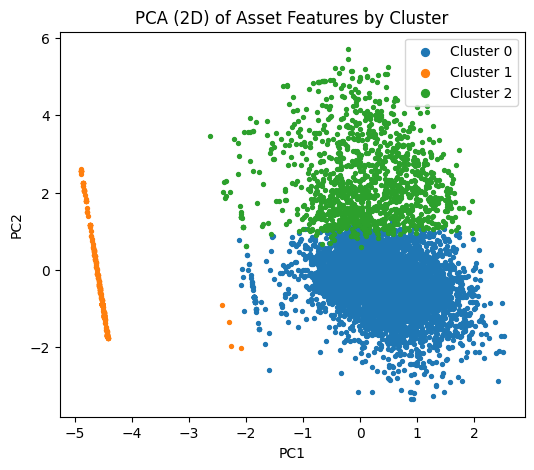

In [64]:
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(6,5))
for c in np.unique(best_labels):
    m = best_labels == c
    plt.scatter(X2[m,0], X2[m,1], s=8, label=f"Cluster {c}")
plt.title("PCA (2D) of Asset Features by Cluster")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.show()

4) Inspect clusters (centroids in original scale)

In [65]:
centroids_std = best_model.cluster_centers_
centroids_df  = pd.DataFrame(centroids_std, columns=X_cols)
centroids_unscaled = pd.DataFrame(scaler.inverse_transform(centroids_std), columns=X_cols)
centroids_unscaled

log_Estimated Asset Value (Adj)  log_Building Rentable Square Feet  \
0                        21.378348                           9.188865   
1                         0.095361                           0.009415   
2                        20.839515                           9.810892   

   log_value_psf  Building Age  
0      12.105794     23.787692  
1      11.989278     33.292020  
2      11.023650     67.160743

5) Save clustering outputs

In [66]:
merged.to_csv("t3_assets_with_clusters.csv", index=False)
centroids_unscaled.to_csv("t3_cluster_centroids_unscaled.csv", index=False)
print("Saved: t3_assets_with_clusters.csv, t3_cluster_centroids_unscaled.csv")

Saved: t3_assets_with_clusters.csv, t3_cluster_centroids_unscaled.csv


6) Supervised learning — predict cluster (classification)

In [67]:
# Target = cluster labels created above
y = merged['Asset Cluster'].values

# Features = same X used for clustering
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", (y_pred == y_test).mean())
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9973035439137135

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2049
           1       1.00      1.00      1.00       177
           2       0.99      0.99      0.99       370

    accuracy                           1.00      2596
   macro avg       1.00      1.00      1.00      2596
weighted avg       1.00      1.00      1.00      2596


Confusion matrix:
 [[2044    0    5]
 [   0  177    0]
 [   2    0  368]]


7) Feature importances

Building Age                         0.478526
log_Estimated Asset Value (Adj)      0.249883
log_value_psf                        0.162912
log_Building Rentable Square Feet    0.108679
dtype: float64


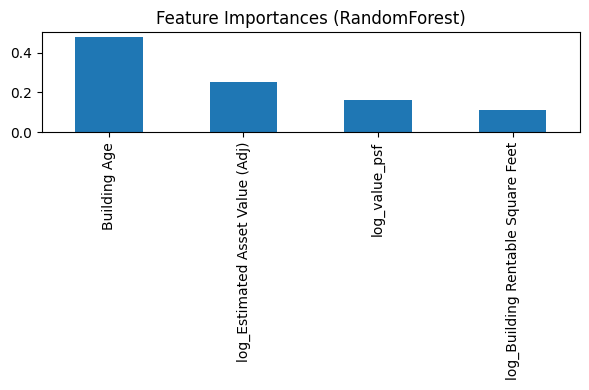

In [68]:
imp = pd.Series(rf.feature_importances_, index=X_cols).sort_values(ascending=False)
print(imp)

# Basic bar plot
plt.figure(figsize=(6,4))
imp.plot(kind='bar')
plt.title("Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

8) Cross-validated accuracy (sanity check)

In [69]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("CV Accuracy: mean=%.3f, std=%.3f" % (cv_scores.mean(), cv_scores.std()))

CV Accuracy: mean=0.995, std=0.001


9) Save model artifacts (for Streamlit later)

In [70]:
joblib.dump(scaler, "t3_scaler.joblib")
joblib.dump(rf, "t3_cluster_classifier_rf.joblib")
print("Saved: t3_scaler.joblib, t3_cluster_classifier_rf.joblib")

Saved: t3_scaler.joblib, t3_cluster_classifier_rf.joblib


10) Quick summaries to use in your report

In [71]:
# Cluster sizes
sizes = merged['Asset Cluster'].value_counts().sort_index()
print("Cluster sizes:\n", sizes)

# Cluster profiling by medians (value, sqft, $/ft², age)
profile_cols = [COL_VALUE, COL_SQFT, COL_VPSF]
if COL_AGE: profile_cols.append(COL_AGE)
cluster_profile = merged.groupby('Asset Cluster')[profile_cols].median().sort_index()
cluster_profile

Cluster sizes:
 Asset Cluster
0    6831
1     589
2    1232
Name: count, dtype: int64


Estimated Asset Value (Adj)  Building Rentable Square Feet  \
Asset Cluster                                                               
0                             1.761460e+09                         9696.0   
1                             0.000000e+00                            0.0   
2                             1.056371e+09                        19527.5   

                   value_psf  Building Age  
Asset Cluster                               
0              177875.395200          25.0  
1              280411.776332          25.0  
2               55529.808160          61.0

**Task 3 Results Summary**

---


**1. Clustering (Unsupervised KMeans)**

Optimal clusters (k=3) with silhouette = 0.536 → good separation.

**Cluster sizes:**

Cluster 0 → 6,831 assets

Cluster 1 → 589 assets

Cluster 2 → 1,232 assets

**Profiles (medians):**

Cluster 0: Typical assets, mid-value (≈ $1.76B), 9,700 sq.ft., strong value per sq.ft. (~177k), age ~25 years.

Cluster 1: Very small group, near-zero value/sqft (likely data errors or underutilized assets), ~25 years age.

Cluster 2: Larger buildings, high total value ($1.05B), 19,500 sq.ft., lower value per sq.ft. (~55k), older (61 years).

**Interpretation:**

Cluster 0 = core portfolio (healthy assets).

Cluster 1 = underperformers / anomalies.

Cluster 2 = large, older stock with value but potentially efficiency issues.

---



**2. Classification (Supervised Random Forest)**

Accuracy = ~99.7% on held-out test set.

Cross-validated accuracy = ~99.5% ± 0.1%.

Confusion matrix shows near-perfect prediction across clusters.

**Feature importance:**

Building Age (0.48) → strongest driver.

Log Asset Value (0.25) and log value per sq.ft. (0.16) also key.

Size (sq.ft.) (0.10) less important once value is included.

***Takeaway: Cluster labels are very predictable from simple features, so the model can be used to classify new assets automatically into strategic classes.***

---



**3. Managerial Insights**

Cluster 0 (core assets): bulk of the portfolio, strong efficiency, focus on maintenance.

Cluster 1 (underperformers): very small, needs audit → possible disposal, redevelopment, or error-check.

Cluster 2 (large older assets): high value but aging → candidates for refurbishment or modernization.

***Model deployment: the trained RF classifier + scaler can be integrated in a Streamlit app to instantly classify any new asset record.***

In [72]:
merged.to_csv("asset_valuation_results_final_with_confidence.csv", index=False)
from google.colab import files
files.download("asset_valuation_results_final_with_confidence.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>